In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

#### We assume that the robustness measures are stored in a dictionary D. Feature names are the keys of D and map to a dictionary mapping robustness names to their computed values.

In [4]:
import json
json_path = "../data/20180531-075608-debug/robustness_measures/computations.json"
with open(json_path) as f:
    feature_dic = json.load(f)

In [5]:
print("Number of features {}".format(len(feature_dic)))

Number of features 92


In [8]:
feature_names = list(feature_dic.keys())
feature_names

['brain_firstorder_10Percentile',
 'brain_firstorder_90Percentile',
 'brain_firstorder_Energy',
 'brain_firstorder_Entropy',
 'brain_firstorder_InterquartileRange',
 'brain_firstorder_Kurtosis',
 'brain_firstorder_Maximum',
 'brain_firstorder_MeanAbsoluteDeviation',
 'brain_firstorder_Mean',
 'brain_firstorder_Median',
 'brain_firstorder_Minimum',
 'brain_firstorder_Range',
 'brain_firstorder_RobustMeanAbsoluteDeviation',
 'brain_firstorder_RootMeanSquared',
 'brain_firstorder_Skewness',
 'brain_firstorder_TotalEnergy',
 'brain_firstorder_Uniformity',
 'brain_firstorder_Variance',
 'brain_glcm_Autocorrelation',
 'brain_glcm_ClusterProminence',
 'brain_glcm_ClusterShade',
 'brain_glcm_ClusterTendency',
 'brain_glcm_Contrast',
 'brain_glcm_Correlation',
 'brain_glcm_DifferenceAverage',
 'brain_glcm_DifferenceEntropy',
 'brain_glcm_DifferenceVariance',
 'brain_glcm_Id',
 'brain_glcm_Idm',
 'brain_glcm_Idmn',
 'brain_glcm_Idn',
 'brain_glcm_Imc1',
 'brain_glcm_Imc2',
 'brain_glcm_InverseVa

In [12]:
some_feature = feature_names[0]
print("Number of samples {}".format(feature_dic[some_feature]["n_samples"]))

Number of samples 113


In [18]:
robustness_names = list(feature_dic[some_feature].keys())
robustness_names.remove('n_samples')
robustness_names

['ICC_C1', 'ICC_A1', 'pearsonr', 'linccc']

## Sort by robustness value

In [35]:
def sort_by_value(f_dic, robustness_name):
    # Collect values
    pairs = []
    for f_name in f_dic:
        pairs.append((f_name, f_dic[f_name][robustness_name]))

    # Sort by second value (robustness)
    pairs = sorted(pairs, key=lambda x: -x[1])
    return pairs

In [36]:
for r_name in robustness_names:
    s = sort_by_value(feature_dic, r_name)
    print("--- {} ---".format(r_name))
    for t in s[:15]:
        print(t)

--- ICC_C1 ---
('brain_glcm_Idmn', 0.7091813542299263)
('brain_glcm_Correlation', 0.6336038176639441)
('brain_firstorder_Skewness', 0.6008108603262344)
('brain_glszm_SmallAreaEmphasis', 0.600406527085757)
('brain_glszm_SizeZoneNonUniformityNormalized', 0.5966969625217929)
('brain_glcm_Contrast', 0.5947299753100489)
('brain_glcm_DifferenceVariance', 0.594512775959436)
('brain_glcm_InverseVariance', 0.592113215759138)
('brain_glcm_ClusterProminence', 0.5863827373541627)
('brain_glrlm_RunEntropy', 0.5827958979912645)
('brain_glszm_SizeZoneNonUniformity', 0.5794225702889128)
('brain_ngtdm_Contrast', 0.578937017030559)
('brain_glcm_Idn', 0.5788307068916744)
('brain_glcm_DifferenceAverage', 0.5787159711936403)
('brain_glcm_ClusterShade', 0.5769403158719959)
--- ICC_A1 ---
('brain_glcm_Idmn', 0.7098421252647636)
('brain_glcm_Correlation', 0.6183096779316335)
('brain_firstorder_Skewness', 0.589079908389471)
('brain_glszm_SmallAreaEmphasis', 0.5888330010581414)
('brain_glcm_InverseVariance', 0.

## Robustness Histogram

In [37]:
import matplotlib.pyplot as plt

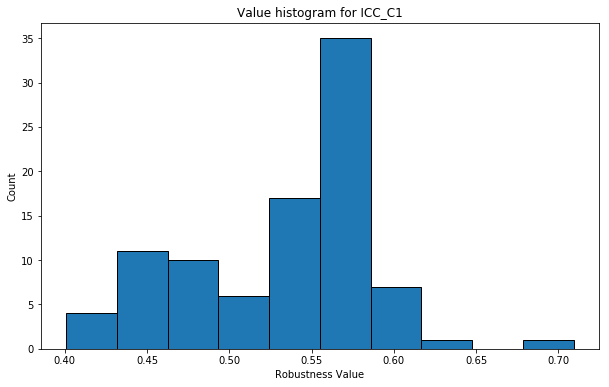

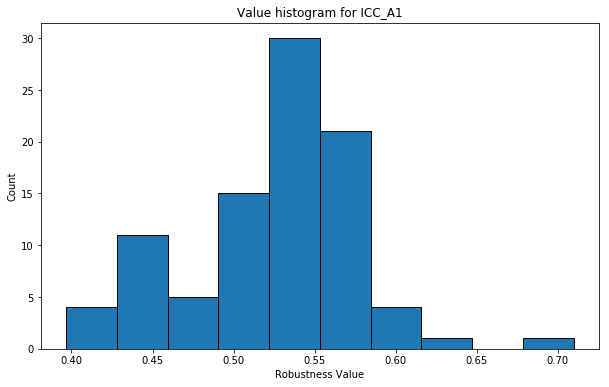

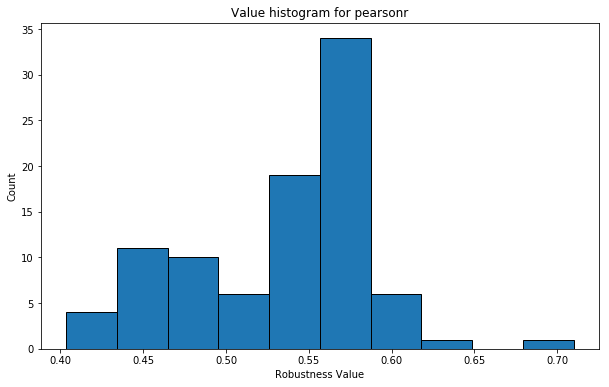

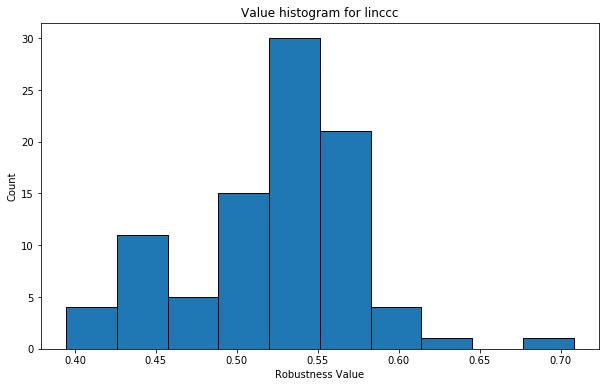

In [41]:
for r_name in robustness_names:
    # collect values
    values = []
    for f_name in feature_dic:
        values.append(feature_dic[f_name][r_name])
        
    plt.figure(figsize=(10, 6))
    plt.title("Value histogram for {}".format(r_name))
    plt.xlabel("Robustness Value")
    plt.ylabel("Count")
    plt.hist(values, edgecolor='black')